In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer


In [3]:
#Import data
train = pd.read_csv('../communal/Ames_Housing_Price_Data_cleaned_2.csv')

In [4]:
#EDA
train.sample(10)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,MoSold,YrSold,SaleType,SaleCondition,lot_bucket,mean_LotFrontage,MapRefNo,Prop_Addr,lat,long
2565,528120020,1717,255500,20,RL,87.0,11146,Pave,None,IR1,...,7,2009,WD,Normal,"(10297.687, 11297.43]",74.609649,528120020.0,3120 WESTON DR,42.061121,-93.654977
2060,902304040,2210,117500,70,RM,90.0,9900,Pave,None,Reg,...,5,2007,WD,Normal,"(9297.944, 10297.687]",74.055556,902304040.0,721 CLARK AVE,42.028710,-93.617328
2184,902206090,1182,120000,50,RM,56.0,9576,Pave,None,Reg,...,5,2006,WD,Normal,"(9297.944, 10297.687]",74.055556,902206090.0,925 CARROLL AVE,42.031168,-93.609176
1352,902325050,1768,163000,75,RM,60.0,10800,Pave,None,Reg,...,10,2006,WD,Normal,"(10297.687, 11297.43]",74.609649,902325050.0,817 KELLOGG AVE,42.029622,-93.614123
2289,907175100,1779,197900,60,RL,80.0,10400,Pave,None,Reg,...,3,2009,WD,Normal,"(10297.687, 11297.43]",74.609649,907175100.0,5303 THACKERAY DR,42.018642,-93.690864
1082,902205130,960,108500,30,RM,50.0,6000,Pave,None,Reg,...,7,2007,WD,Normal,"(5298.972, 6298.715]",54.060150,902205130.0,1128 STAFFORD AVE,42.032879,-93.607594
986,534275010,1050,136500,20,RL,74.6,10659,Pave,None,IR1,...,1,2006,COD,Normal,"(10297.687, 11297.43]",74.609649,534275010.0,2127 MELROSE AVE,42.043475,-93.624412
601,923203110,1204,162000,120,RM,32.0,4500,Pave,None,Reg,...,6,2009,WD,Normal,"(4299.229, 5298.972]",46.564516,923203110.0,3322 EMERALD DR,41.992253,-93.607935
2255,907181120,1652,207500,60,RL,68.0,8998,Pave,None,IR1,...,6,2008,WD,Normal,"(8298.201, 9297.944]",68.724832,907181120.0,5334 CERVANTES DR,42.017053,-93.691188
2506,534202170,1568,143000,20,RL,80.0,9600,Pave,None,Reg,...,3,2009,COD,Normal,"(9297.944, 10297.687]",74.055556,534202170.0,1223 25TH ST,42.046713,-93.627047


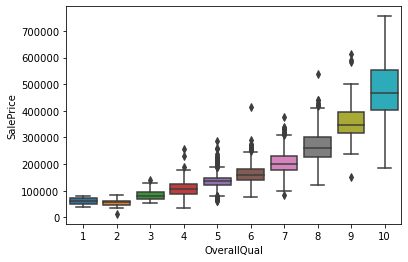

In [6]:
overall %quickrefality
ax = sns.boxplot(x="OverallQual", y="SalePrice", data=train)

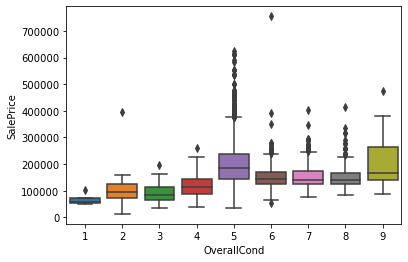

In [7]:
# Overall Condition
ax = sns.boxplot(x="OverallCond", y="SalePrice", data=train)

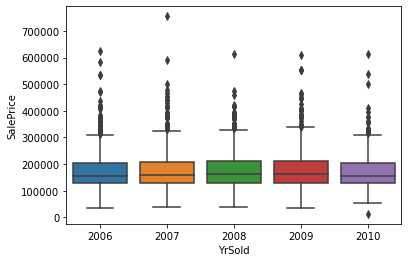

In [8]:
#year Sold
ax = sns.boxplot(x="YrSold", y="SalePrice", data=train)
sns.boxplot()


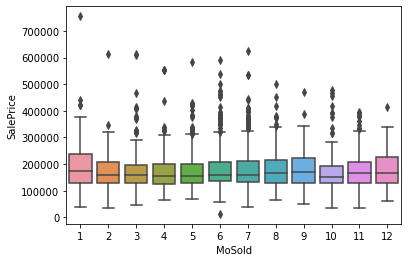

In [9]:
ax = sns.boxplot(x="MoSold", y="SalePrice", data=train)
#It looks like there is very little pricing seasonality

Text(0.5, 1.0, 'Sale Price by Month and Year')

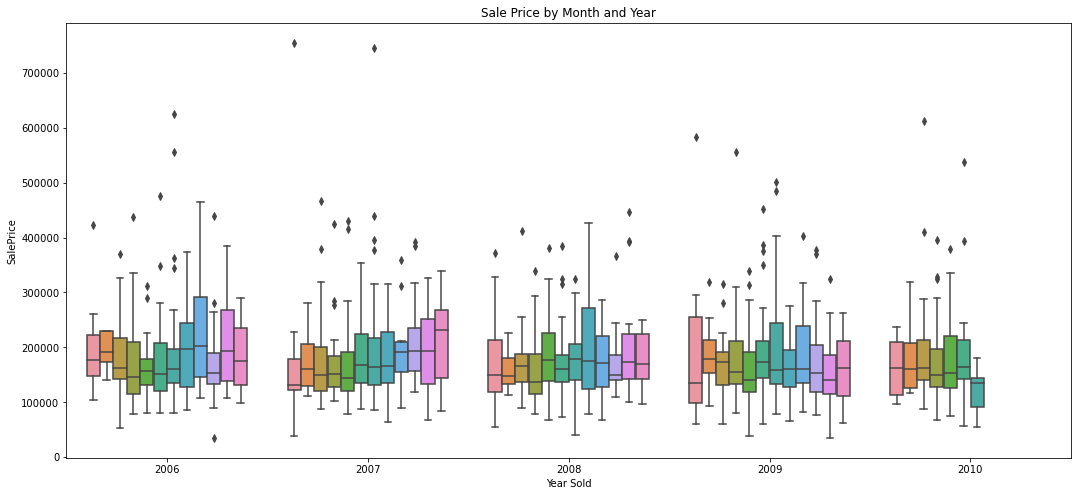

In [8]:
#month Sold
plt.figure(figsize=(18,8))
ax = sns.boxplot(x="YrSold", y="SalePrice", hue="MoSold", data=train)
ax.legend_.remove()
ax.set_xlabel('Year Sold')
ax.set_title('Sale Price by Month and Year')
#Aside from prices diving in December 2010, there is surprisingly little seasonality in Sale Prices

Text(0.5, 1.0, 'Sale Price of Different Quality Houses by Year')

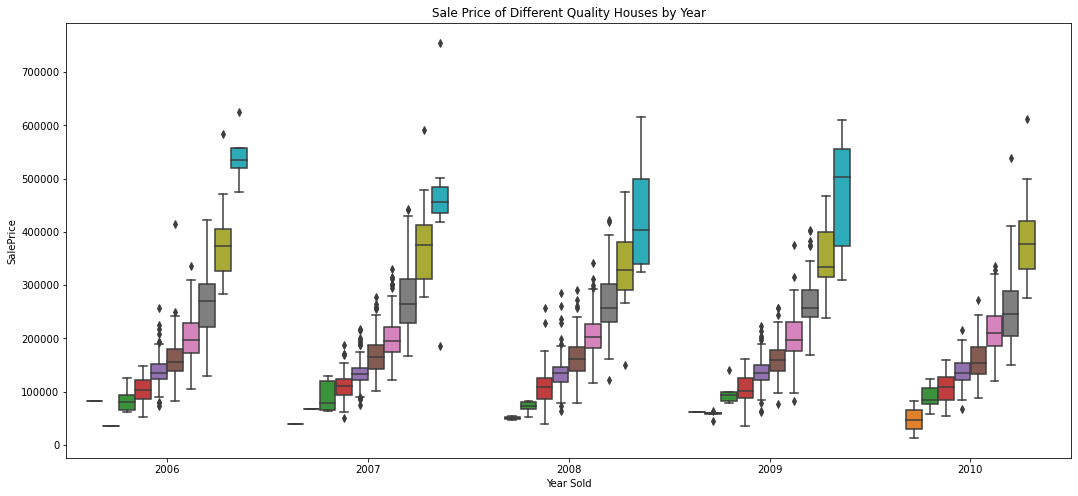

In [10]:
#did houses of the same quality get priced differently throughout the years?
plt.figure(figsize=(18,8))
ax = sns.boxplot(x="YrSold", y="SalePrice", hue="OverallQual", data=train)
ax.legend_.remove()
ax.set_xlabel('Year Sold')
ax.set_title('Sale Price of Different Quality Houses by Year')

Text(0.5, 1.0, 'Features Correlating with Sale Price')

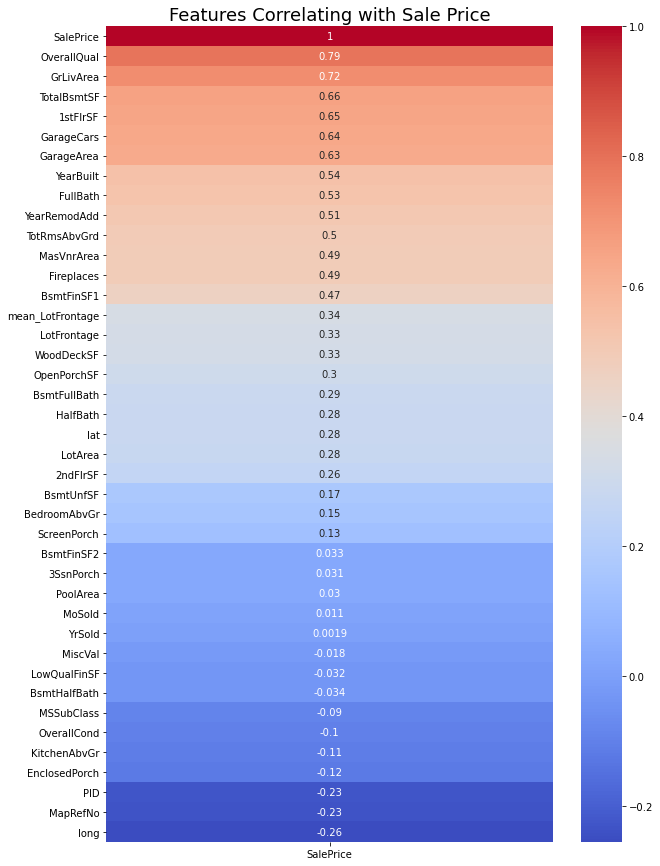

In [12]:
#heatmap of variables with the highest correlation to sale price
plt.figure(figsize=(10,15))
sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True, cmap='coolwarm').set_title('Features Correlating with Sale Price', fontdict={'fontsize':18})

Text(0.5, 1.0, 'Correlation Heatmap')

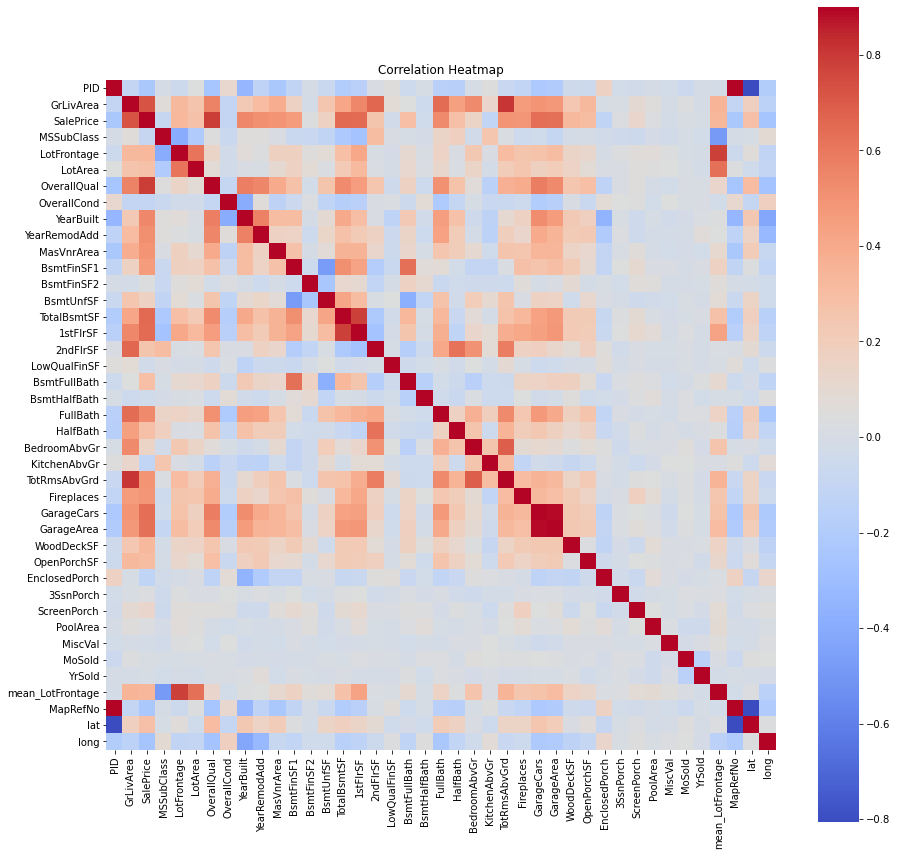

In [13]:
#heatmap to get a sense of correlations
plt.figure(figsize=(15,15))
ax=sns.heatmap(train.corr(), vmax=0.9, square=True, cmap='coolwarm')
ax.set_title('Correlation Heatmap')

- GarageCars seems perfectly correlated with GarageArea, so we can drop GarageCars
- YearBuilt is highly correlated with GarageYrBuilt, which is also correlated with YearRemodAdd, so we can drop GarageYrBuilt
- GrLivArea is highly correlated with TotRmsAbvGrd, we can drop TotRmsAbvGrd
- TotalBsmtSF is highly correlated with 1stFlSF, and since we have this variable we can drop BsmtUnfSF, BsmtFinSF1, BsmtFinSF2
- BsmtFinSF1 is correlated with BsmtFullBath
- We will also drop 1stFlrSF & 2ndFlrSF since this will be expressed in GrLivArea

In [147]:
predicted = lasso.predict(x_test)
predicted_trans = np.exp(predicted)
predicted_trans

submit = pd.DataFrame()
submit['Id'] = test_ID
submit['SalePrice'] = predicted_trans
sub.to_csv('Kaggle_submit.csv',index=False)
submit

,Id,SalePrice
0,1461,121399.771523
1,1462,160681.680585
2,1463,174201.499620
3,1464,193422.208543
4,1465,191259.321145
...,...,...
1454,2915,87517.092829
1455,2916,84519.129253
1456,2917,157075.770383
1457,2918,115772.382513
